In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize table

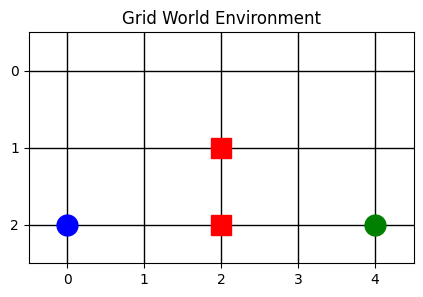

In [2]:
# Define Grid World environment
grid_size = (5,3)
initial_state = (2,0)

# event 
goal_state = (2, 4)
obstacle_states = [(1, 2), (2, 2)]
'''
# event 2
obstacle_states = [(1, 1), (2, 1),
                   (0, 3), (1, 3)]
goal_state = (0, 4)
'''

# Create Q-table
q_table = np.zeros((grid_size[1], grid_size[0], 4))

# Visualize Grid World environment
plt.figure(figsize=(grid_size[0], grid_size[1]))
plt.imshow(np.zeros((grid_size[1], grid_size[0])), cmap='gray', alpha=0)  # Background
plt.xticks(np.arange(grid_size[0]))
plt.yticks(np.arange(grid_size[1]))
plt.grid(True, linewidth=1, color='black')


plt.plot(initial_state[1], initial_state[0], 'bo', markersize=15)
# Visualize goal state
plt.plot(goal_state[1], goal_state[0], 'go', markersize=15)

# Visualize obstacle states
for obstacle in obstacle_states:
    plt.plot(obstacle[1], obstacle[0], 'rs', markersize=15)

plt.title("Grid World Environment")
plt.show()

In [3]:
q_table_df = pd.DataFrame(q_table.reshape(-1, 4), columns=['Up', 'Down', 'Left', 'Right'])
q_table_df['State'] = [(i, j) for i in range(grid_size[1]) for j in range(grid_size[0])]
q_table_df = q_table_df.set_index('State')

print("Q-table DataFrame:")
print(q_table_df)

Q-table DataFrame:
         Up  Down  Left  Right
State                         
(0, 0)  0.0   0.0   0.0    0.0
(0, 1)  0.0   0.0   0.0    0.0
(0, 2)  0.0   0.0   0.0    0.0
(0, 3)  0.0   0.0   0.0    0.0
(0, 4)  0.0   0.0   0.0    0.0
(1, 0)  0.0   0.0   0.0    0.0
(1, 1)  0.0   0.0   0.0    0.0
(1, 2)  0.0   0.0   0.0    0.0
(1, 3)  0.0   0.0   0.0    0.0
(1, 4)  0.0   0.0   0.0    0.0
(2, 0)  0.0   0.0   0.0    0.0
(2, 1)  0.0   0.0   0.0    0.0
(2, 2)  0.0   0.0   0.0    0.0
(2, 3)  0.0   0.0   0.0    0.0
(2, 4)  0.0   0.0   0.0    0.0


# Main Function

In [4]:
# Function to choose action (epsilon-greedy policy)
def choose_action(state, q_table, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(4)  # Exploration
    else:
        return np.argmax(q_table[state[0], state[1]])  # Exploitation

# Function to perform a step in the environment
def step(state, action):
    row, col = state
    if action == 0:  # up
        row = max(0, row - 1)
    elif action == 1:  # down
        row = min(grid_size[1] - 1, row + 1)
    elif action == 2:  # left
        col = max(0, col - 1)
    elif action == 3:  # right
        col = min(grid_size[0] - 1, col + 1)

    next_state = (row, col)

    if next_state == goal_state:
        reward = 1
        done = True
    elif next_state in obstacle_states:
        reward = -1
        done = True
    else:
        reward = 0
        done = False

    return next_state, reward, done

# SARSA training

## Upadte Q-value

**Action-value** $Q_\pi$

$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha [r_t + \gamma Q(s_{t+1},a_{t+1}) - Q(s_t,a_t)]$

on-policy

In [5]:
# Define parameters
discount_factor = 0.95
epsilon = 0.1
learning_rate = 0.8
max_steps_per_episode = 700
num_episodes = 10000

In [6]:
# SARSA training
episode_rewards = []
for episode in range(num_episodes):
    state = (0, 0)
    done = False
    step_count = 0
    total_reward = 0

    action = choose_action(state, q_table, epsilon) # choose first action

    while not done and step_count < max_steps_per_episode:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state, q_table, epsilon) # choose next action

        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + learning_rate * (
            reward + discount_factor * q_table[next_state[0], next_state[1], next_action] - q_table[state[0], state[1], action]
        )

        state = next_state
        action = next_action # update action
        step_count += 1
        total_reward += reward
        
    episode_rewards.append(total_reward)
    
average_rewards = np.cumsum(episode_rewards) / (np.arange(len(episode_rewards)) + 1)

# Visualization

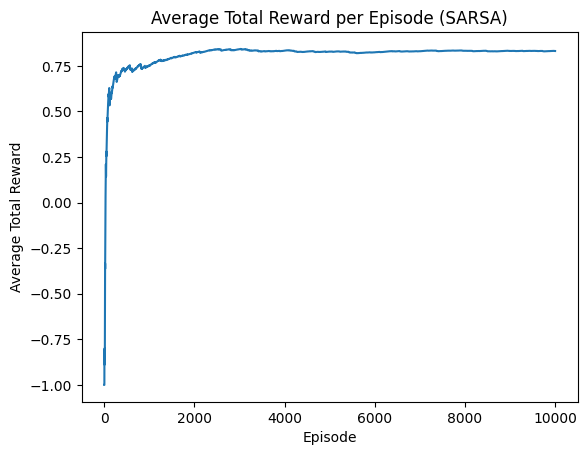

In [7]:
plt.plot(average_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Total Reward")
plt.title("Average Total Reward per Episode (SARSA)")
plt.show()

Path: [(2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4)]


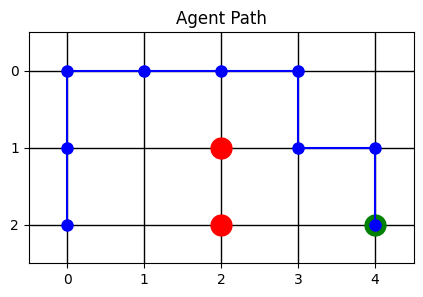

In [8]:
# Test learned agent
state = initial_state
done = False
path = [state]
step_count = 0

while not done and step_count < max_steps_per_episode:
    action = np.argmax(q_table[state[0], state[1]])
    next_state, reward, done = step(state, action)
    path.append(next_state)
    state = next_state
    step_count += 1

print("Path:", path)

# Visualize agent path
plt.figure(figsize=(grid_size[0], grid_size[1]))
plt.imshow(np.zeros((grid_size[1], grid_size[0])), cmap='gray', alpha=0)  # Background
plt.xticks(np.arange(grid_size[0]))
plt.yticks(np.arange(grid_size[1]))
plt.grid(True, linewidth=1, color='black')

plt.plot(goal_state[1], goal_state[0], 'go', markersize=15)

for obstacle in obstacle_states:
    plt.plot(obstacle[1], obstacle[0], 'ro', markersize=15)

path_x = [p[1] for p in path]
path_y = [p[0] for p in path]
plt.plot(path_x, path_y, 'b-o', markersize=8)

plt.title("Agent Path")
plt.show()

Q-table DataFrame:
              Up      Down      Left     Right
State                                         
(0, 0) -0.000873 -0.032411 -0.001996  0.654448
(0, 1) -0.457695 -0.025465 -0.003951  0.775669
(0, 2)  0.653270 -1.000000  0.431750  0.850239
(0, 3)  0.736849  0.902500  0.649650  0.846085
(0, 4)  0.837721  0.935160  0.745300  0.835753
(1, 0)  0.000348  0.000138 -0.571826 -0.140593
(1, 1) -0.443253 -0.030856 -0.073815 -1.000000
(1, 2)  0.000000  0.000000  0.000000  0.000000
(1, 3)  0.542685  0.937840 -1.000000  0.950000
(1, 4)  0.840165  1.000000  0.856267  0.950000
(2, 0)  0.001094 -0.317090 -0.104130 -0.013521
(2, 1) -0.737870 -0.163644  0.006574 -1.000000
(2, 2)  0.000000  0.000000  0.000000  0.000000
(2, 3)  0.743665  0.950000 -1.000000  1.000000
(2, 4)  0.000000  0.000000  0.000000  0.000000


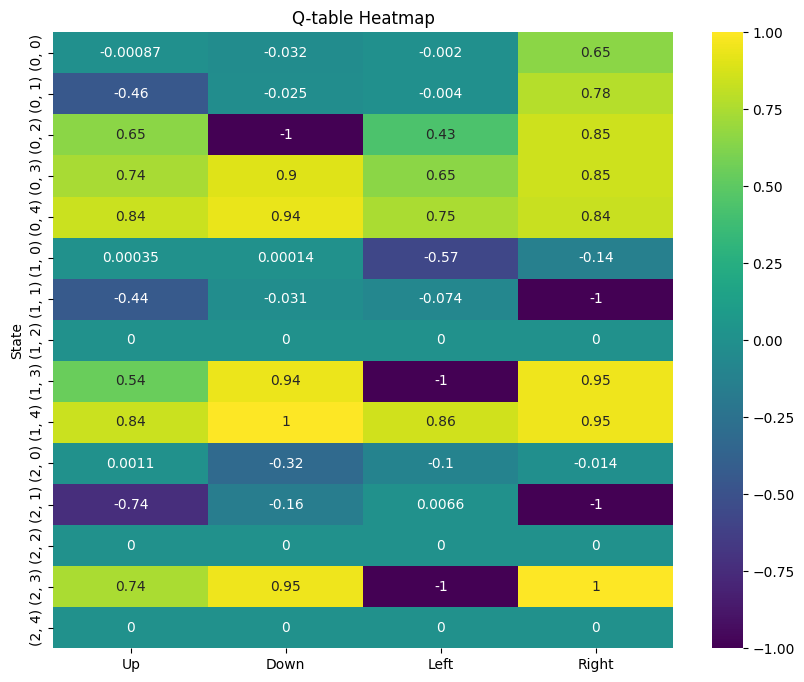

In [9]:
q_table_df = pd.DataFrame(q_table.reshape(-1, 4), columns=['Up', 'Down', 'Left', 'Right'])
q_table_df['State'] = [(i, j) for i in range(grid_size[1]) for j in range(grid_size[0])]
q_table_df = q_table_df.set_index('State')

print("Q-table DataFrame:")
print(q_table_df)

plt.figure(figsize=(10, 8))
sns.heatmap(q_table_df, annot=True, cmap='viridis')
plt.title("Q-table Heatmap")
plt.show()